In [3]:
###Loading Initial libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# **Dataset initial observations**

In [4]:
LS=pd.read_csv('Lead Scoring.csv')
LS.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
print("Number of Rows in Dataset=",LS.shape[0],"and number of Columns in dataset=",LS.shape[1])

Number of Rows in Dataset= 9240 and number of Columns in dataset= 37


# #Replacing the space in column names by '_' and converting to lower case

In [6]:

LS.columns = LS.columns.str.lower().str.strip().str.replace(' ','_')
LS.rename(columns = {'totalvisits':'total_visits'},inplace = True)
LS.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

#### Datatypes

In [7]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   prospect_id                                    9240 non-null   object 
 1   lead_number                                    9240 non-null   int64  
 2   lead_origin                                    9240 non-null   object 
 3   lead_source                                    9204 non-null   object 
 4   do_not_email                                   9240 non-null   object 
 5   do_not_call                                    9240 non-null   object 
 6   converted                                      9240 non-null   int64  
 7   total_visits                                   9103 non-null   float64
 8   total_time_spent_on_website                    9240 non-null   int64  
 9   page_views_per_visit                           9103 

In [8]:

Cat=[]
Num=[]
for i in LS.columns:
    if LS[i].dtype=='float64' or LS[i].dtype=='int64':
        Num.append(i)
    else :
        Cat.append(i)

In [9]:
print("The Numerical features in the dataset are ",Num)

The Numerical features in the dataset are  ['lead_number', 'converted', 'total_visits', 'total_time_spent_on_website', 'page_views_per_visit', 'asymmetrique_activity_score', 'asymmetrique_profile_score']


In [10]:
print("The categorical features in the dataset are ",Cat)

The categorical features in the dataset are  ['prospect_id', 'lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'country', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'tags', 'lead_quality', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'lead_profile', 'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']


# **describe() - Five point summary and inferences**

Calculating Five-number summary for numerical columns:

In [11]:
LS.describe()

,lead_number,converted,total_visits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_score,asymmetrique_profile_score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


The Inferences from the 5 point summary are-

1. **Lead Number** is a  unique Id generated for each customer. It will not add any value to the model as the statistical summary will not add  any insight or pattern .

2. **Converted**- This is our target variable with only 0 and 1 as values.

3. **Total Visits**- The distribution is right skewed because interested    individuals tend to visit the website more number of times.
As per the values, 1st quartile(1 visit per person) of the visits come from people  who tend to visit the site once and never come back. The second and third quartiles(1-5 visit per person) of the visits come from customers who want to gain an idea about Z education.Lastly, the people whose number of  total visits lie in the last quartile are the most engaged customers, with upto a max of 251 visits to the website.
Here the highest visits are outliers for the feature.

4. **Total Time Spent on Website**- The distribution is right skewed because interested individuals tend to visit the website for longer duration of time.
As per the values, the low 25 percentile engagement of the website comes from people  who tend to spend less time on the website. The second and third quartiles define an average of the engagement, 487 minutes. This comes from customers who want to gain an idea about X education. Lastly, the people whose time spent on the website lies in the last quartile are the most engaged customers.
Here there are no outliers above IQR region.

5. **Page Views Per Visit**-The distribution is right skewed because interested individuals tend to the visit more number of  pages on  the website.
As per the values,25%(1 visit) of the page visits come  from people  who tend to visit only the landing page. 50-75 %(2-3 visit) of the page  visits come from customers who search for few courses but do not engage with X education. Lastly, the people whose number of page visits lie in the last quartile are the most engaged customers.
Here the highest page visits are outliers for the feature.



6. **Asymmetrique Activity Score** and 	**Asymmetrique Profile Score** are discrete values.Hence statistical summary will not add any insight. However, we will perform Univariate /Bivariate Analysis with other 'asymmetrique' features.


# **Lead Number and Prospect ID to be dropped.**
It will not be of use for any insight, hence we will drop them

In [12]:

print(LS['lead_number'].nunique())
print(LS['prospect_id'].nunique())

LS=LS.drop(['lead_number'],axis=1)
LS=LS.drop(['prospect_id'],axis=1)

9240
9240


# Grouping for categorical features:

In [13]:
LS['lead_origin']=LS['lead_origin'].replace(['Lead Import','Quick Add Form'],'others')
LS['lead_source']=LS['lead_source'].replace(['NC_EDM','Pay per Click Ads','testone','youtubechannel','youtubechannel','welearnblog_Home','blog','WeLearn','Welingak Website','WeLearn','Live Chat','Referral Sites','Facebook','bing','Click2call','Social Media','Press_Release'],'others')
LS['last_activity']=LS['last_activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Received','Email Marked Spam','View in browser link Clicked','Approached upfront','Had a Phone Conversation','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed'],'others')

LS['country']=LS['country'].replace(['Vietnam','Indonesia','Sri Lanka','Switzerland','Russia','Malaysia','Denmark','Tanzania','Liberia','Kenya','Italy','China','Bangladesh','Asia/Pacific Region','Belgium','Netherlands','Uganda','Philippines','Ghana','Sweden','Canada','South Africa','Germany','Nigeria','Kuwait','unknown','Oman','France','Bahrain','Hong Kong','Qatar','Australia','United Kingdom','Saudi Arabia','United States','United Arab Emirates','Singapore'],'Non Indian')

LS['specialization']=LS['specialization'].replace(['Services Excellence','E-Business ','Rural and Agribusiness','Retail Management','E-COMMERCE','Hospitality Management','Travel and Tourism','Media and Advertising','International Business','Healthcare Management'],'others')


LS['how_did_you_hear_about_x_education']=LS['how_did_you_hear_about_x_education'].replace(['Email','SMS','Other','Multiple Sources' ,'Advertisements','Social Media' ],'others')

LS['what_is_your_current_occupation']=LS['what_is_your_current_occupation'].replace(['Other','Businessman','Housewife'],'others')

LS['what_matters_most_to_you_in_choosing_a_course']=LS['what_matters_most_to_you_in_choosing_a_course'].replace(['Flexibility & Convenience','Other'],'Flexibility & Convenience')

LS['tags']=LS['tags'].replace(['Recognition issue (DEC approval)','Shall take in the next coming month','University not recognized','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','invalid number','Diploma holder (Not Eligible)','Graduation in progress','Interested  in full time MBA','Not doing further education','Closed by Horizzon','switched off','Busy','Lost to EINS'],'others')

LS['lead_quality'] = LS['lead_quality'].replace(np.nan, 'Not Sure')

LS['lead_profile']=LS['lead_profile'].replace(['Student of SomeSchool','Lateral Student','Dual Specialization Student'],'others')
LS['last_notable_activity']=LS['last_notable_activity'].replace(['Email Marked Spam','Email Received','Approached upfront' ,'Form Submitted on Website' ,'Resubscribed to emails',   'View in browser link Clicked'],'others')


In [14]:
LS['lead_origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
others                       56
Name: lead_origin, dtype: int64

# **Null Value Treatment**



In [15]:
LS['lead_source'].replace({'google':'Google'},inplace=True)
LS = LS.replace('Select', np.nan)

## **Replacing Null Values**

 **Lead source:**
1.	Where lead_origin = lead add form update lead_source as ‘reference’ for null values (33 rows). Mode value with 534 value counts of referencs labels
2.	Where lead_origin = others we are going to update it with ‘others’ (modal value) (2 rows)
3.	Where lead_origin = Landing page submission lead_source will be imputed with because with lead_origin as LPS of the 4886 rows ‘Direct Traffic’ has value counts of 2433 

In [16]:
for value in list(LS['lead_origin'].unique()):
    if value == 'Lead Add Form':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'Reference'
    if value == 'others':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'others'
    if value == 'Landing Page Submission':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'Direct Traffic'



 **Last Activity**
1.	When lead_origin = Lead Add Form, lead_source = Reference and last_notable activity = Modified we are replacing it with ‘SMS Sent’(modal value)

2.	When lead_origin = others, lead_source = others and last_notable activity = Modified we are replacing it with ‘Email Opened’(modal value)

3.	When lead_origin = others, lead_source = others and last_notable activity = Email Opened we are replacing it with ‘Email Opened’(modal value)

In [17]:
for value in list(LS['lead_origin'].unique()):
    if value == 'Lead Add Form':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='Reference') & (LS.last_notable_activity=='Modified') , 'last_activity'] = 'SMS Sent'
    if value == 'others':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='others') & (LS.last_notable_activity=='Modified'), 'last_activity'] = 'Email Opened'
    if value == 'others':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='others') & (LS.last_notable_activity=='Email Opened'), 'last_activity'] = 'Email Opened'

# Specialization

In [18]:
LS['specialization']=LS['specialization'].fillna(method='bfill')

In [19]:
LS['total_visits']=LS['total_visits'].fillna(LS['total_visits'].median())
LS['page_views_per_visit']=LS['page_views_per_visit'].fillna(LS['page_views_per_visit'].median())

LS['country']=LS['country'].fillna(method='bfill')
LS['specialization']=LS['specialization'].fillna(method='bfill')
LS['how_did_you_hear_about_x_education']=LS['how_did_you_hear_about_x_education'].fillna(LS['how_did_you_hear_about_x_education'].mode()[0])
LS['what_is_your_current_occupation']=LS['what_is_your_current_occupation'].fillna(method='bfill')
LS['what_matters_most_to_you_in_choosing_a_course']=LS['what_matters_most_to_you_in_choosing_a_course'].fillna(method='bfill')
LS['tags']=LS['tags'].fillna(method='bfill')
LS['lead_quality'] = LS['lead_quality'].replace(np.nan, 'not sure')
# We drop this column later 
LS['lead_profile']=LS['lead_profile'].fillna(method='bfill')
LS['city']=LS['city'].fillna(method='bfill')



# **Separating Numerical and categorical columns:**

In [20]:
LS_num=LS.select_dtypes(include=np.number)
LS_num=LS_num.iloc[:, 1:-2] 
LS_num.head()

,total_visits,total_time_spent_on_website,page_views_per_visit
0,0.0,0,0.0
1,5.0,674,2.5
2,2.0,1532,2.0
3,1.0,305,1.0
4,2.0,1428,1.0


In [21]:
LS_cat=LS.select_dtypes(include=object)
LS_cat.head()


,lead_origin,lead_source,do_not_email,do_not_call,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,...,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,API,Olark Chat,No,No,Page Visited on Website,India,Business Administration,Online Search,Unemployed,Better Career Prospects,...,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Business Administration,Online Search,Unemployed,Better Career Prospects,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,others,India,others,Word Of Mouth,Unemployed,Better Career Prospects,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Modified
4,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Supply Chain Management,others,Unemployed,Better Career Prospects,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Modified


# ** Outlier treatment (for numerical columns)**

In [22]:
for col in LS_num:
    q1=LS_num[col].quantile(0.25)
    q3=LS_num[col].quantile(0.75)
    IQR=q3-q1
    UB=q3+IQR*1.5
    LB=q1-IQR*1.5
    #list1= LS[LS['total_visits'].isnull()]['lead_origin'].unique()
    #label=[]
    for i in  LS['lead_source'].unique():
        LS_num.loc[(LS_num[col] > UB ) , col] = LS[LS['lead_source']==i][col].quantile(0.99)
        LS_num.loc[(LS_num[col] < LB ) , col] = LS[LS['lead_source']==i][col].quantile(0.01)

In [23]:
LS1=pd.concat([LS_num,LS_cat],axis=1)

In [24]:
LS1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [25]:
LS1.head(2)

,total_visits,total_time_spent_on_website,page_views_per_visit,lead_origin,lead_source,do_not_email,do_not_call,last_activity,country,specialization,...,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,0.0,0.0,0.0,API,Olark Chat,No,No,Page Visited on Website,India,Business Administration,...,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Modified
1,5.0,674.0,2.5,API,Organic Search,No,No,Email Opened,India,Business Administration,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Email Opened


# **Univariate Analysis**

## **'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'**

In [26]:
LS =LS.drop(['asymmetrique_activity_index','asymmetrique_activity_score','asymmetrique_profile_index','asymmetrique_profile_score'],1)
LS_cat =LS_cat.drop(['asymmetrique_activity_index','asymmetrique_profile_index'],1)

In [27]:
LS1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

## **'Do Not Call', 'Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums','Through Recommendations'**

For the above columns Do Not Call, Search, Newspaper, Newspaper Article, Digital Advertisement, X Education Forums, Through Recommendations:  maximum values are same, so we cannot generate any insight for lead conversion from this data. Hence, we will drop these columns.

In [28]:
LS_cat= LS_cat.drop(['do_not_call', 'search', 'newspaper', 'newspaper_article', 'digital_advertisement', 'x_education_forums', 'through_recommendations','what_matters_most_to_you_in_choosing_a_course'],1)

## **Categorical Columns**

In [29]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation', 'magazine',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [30]:
## Dropping 3,5,10,11,14,15,18,19
LS_cat= LS_cat.drop(['do_not_email','country','magazine','receive_more_updates_about_our_courses','update_me_on_supply_chain_content','get_updates_on_dm_content','i_agree_to_pay_the_amount_through_cheque','a_free_copy_of_mastering_the_interview'],1)

In [31]:
LS_cat.head()

,lead_origin,lead_source,last_activity,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,tags,lead_quality,lead_profile,city,last_notable_activity
0,API,Olark Chat,Page Visited on Website,Business Administration,Online Search,Unemployed,Interested in other courses,Low in Relevance,Potential Lead,Mumbai,Modified
1,API,Organic Search,Email Opened,Business Administration,Online Search,Unemployed,Ringing,Not Sure,Potential Lead,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Online Search,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,others,others,Word Of Mouth,Unemployed,Ringing,Not Sure,Potential Lead,Mumbai,Modified
4,Landing Page Submission,Direct Traffic,Converted to Lead,Supply Chain Management,others,Unemployed,Will revert after reading the email,Might be,Potential Lead,Mumbai,Modified


## **Numerical Columns**

In [32]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'last_notable_activity'],
      dtype='object')

def correlation(dataframe) : 
    cor0=dataframe.corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

convertedCondition= LS1['converted']==1
print('Correlations for converted Leads')
correlation(LS1[convertedCondition])[1:30:2].style.background_gradient(cmap='GnBu').hide_index()

#Correlations for un-Converted Leads 
unconvertedCondition=LS1['converted']==0
print('Correlations for Non-Converted Leads')
correlation(LS1[unconvertedCondition])[1:30:2].style.background_gradient(cmap='GnBu').hide_index()

In [33]:
import scipy.stats as stats

In [34]:
LS2=pd.concat([LS_num,LS['converted'],LS_cat,LS['do_not_email'],LS['country'],LS['a_free_copy_of_mastering_the_interview'],LS['what_matters_most_to_you_in_choosing_a_course']],1)


In [35]:
len(LS2.columns)

19

In [36]:
Cat=[]
for i in LS2.columns:
    if LS2[i].dtype=='object':
        Cat.append(i)
print(Cat)


['lead_origin', 'lead_source', 'last_activity', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'tags', 'lead_quality', 'lead_profile', 'city', 'last_notable_activity', 'do_not_email', 'country', 'a_free_copy_of_mastering_the_interview', 'what_matters_most_to_you_in_choosing_a_course']


#LS3 is specifically for categorical columns
LS3=LS2[Cat]
LS3

In [37]:
import scipy.stats as stats
for col in LS2:
    cont = pd.crosstab(LS2[col],LS2['converted'])
    print(col, stats.chi2_contingency(cont)[1])

total_visits 1.7498701002952801e-29
total_time_spent_on_website 5.219044086021993e-122
page_views_per_visit 7.4601403269334395e-06
converted 0.0
lead_origin 3.297968402797898e-212
lead_source 6.4377126536389006e-223
last_activity 0.0
specialization 0.003925326000894326
how_did_you_hear_about_x_education 0.004525468280084786
what_is_your_current_occupation 4.2546452161316175e-114
tags 0.0
lead_quality 0.0
lead_profile 1.3981609784024118e-40
city 0.18215545393865212
last_notable_activity 5.55895202495475e-283
do_not_email 1.3384599721779416e-38
country 0.011100880939005268
a_free_copy_of_mastering_the_interview 0.00014201097210552065
what_matters_most_to_you_in_choosing_a_course 0.8779137137927155


# Transformation and Scaling:

In [38]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
LS_num_pt=pd.DataFrame(pt.fit_transform(LS_num),columns=LS_num.columns)
LS_num_pt.head()


,total_visits,total_time_spent_on_website,page_views_per_visit
0,-1.447852,-1.473767,-1.460157
1,0.812110,0.729628,0.337853
2,-0.216838,1.306093,0.046968
3,-0.721778,0.264936,-0.613575
4,-0.216838,1.252499,-0.613575


In [39]:
LS1=pd.concat([LS_num_pt,LS_cat,LS['converted'],LS['do_not_email'],LS['country'],LS['a_free_copy_of_mastering_the_interview'],LS['what_matters_most_to_you_in_choosing_a_course']],axis=1)
LS1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city', 'last_notable_activity',
       'converted', 'do_not_email', 'country',
       'a_free_copy_of_mastering_the_interview',
       'what_matters_most_to_you_in_choosing_a_course'],
      dtype='object')

In [40]:
Cat=[]
for i in LS1.columns:
    if LS1[i].dtype=='object':
        Cat.append(i)
df1=LS1
df1=pd.get_dummies(data=df1,drop_first=True)

In [41]:
df1.head()

,total_visits,total_time_spent_on_website,page_views_per_visit,converted,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,...,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_others,do_not_email_Yes,country_Non Indian,a_free_copy_of_mastering_the_interview_Yes,what_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience
0,-1.447852,-1.473767,-1.460157,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.812110,0.729628,0.337853,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.216838,1.306093,0.046968,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.721778,0.264936,-0.613575,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.216838,1.252499,-0.613575,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
LS1.shape

(9240, 19)

In [43]:
df1.shape

(9240, 61)

# Separating target and independent variables

In [44]:
x=df1.drop(['converted'],axis=1)
y=df1['converted']
x.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_others', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Reference',
       'lead_source_others', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'last_activity_others', 'specialization_Business Administration',
       'specialization_E-Business', 'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Operations Management',
       'specialization_Supply Chain Management', 'specialization_others',
       'how_did_you_hear_about_x_education_Student of SomeSchool',
       'how_did_you_hear_about_x_education_Word 

# Splitting the data into train_test

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

## **Base Model**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)
model1


LogisticRegression()

In [47]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(LR,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

bias error: 0.06645509742501265 variance error: 0.0029121557412618696


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predicted=LR.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Logistic Regression base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Logistic Regression base model= 87.77056277056276


array([[1552,  130],
       [ 209,  881]], dtype=int64)

In [49]:
NB=GaussianNB()
model3=NB.fit(xtrain,ytrain)


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predicted=NB.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Naive Bayes base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Naive Bayes base model= 81.0966810966811


array([[1439,  243],
       [ 281,  809]], dtype=int64)

In [51]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(NB,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

bias error: 0.12982003364426764 variance error: 0.006986148349882503


In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
model4=dt.fit(xtrain,ytrain)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predicted=dt.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Decission Tree base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Decission Tree base model= 84.88455988455989


array([[1475,  207],
       [ 212,  878]], dtype=int64)

In [54]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(dt,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

bias error: 0.15288428625230954 variance error: 0.013686796370829838


In [55]:
u=[87,82,86]
#b=pd.concat(a)
l=['LogisticRegression','GaussianNB','DecisionTree']
h=pd.DataFrame(data=u,index=l,columns=['Accuracy'])
h.head()

,Accuracy
LogisticRegression,87
GaussianNB,82
DecisionTree,86


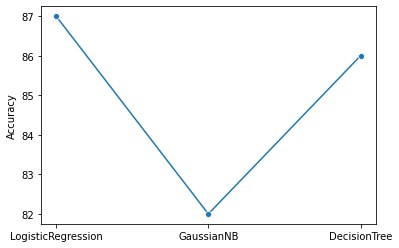

In [56]:
sns.lineplot(y=h['Accuracy'],x=h.index,marker='o')
plt.show()

In [57]:
BE=[0.06971378025644392,0.12647517678497588,0.15343311294270046]
VE=[0.0050639719710028445,0.0057819258576719615,0.012268556938324416]
l

['LogisticRegression', 'GaussianNB', 'DecisionTree']

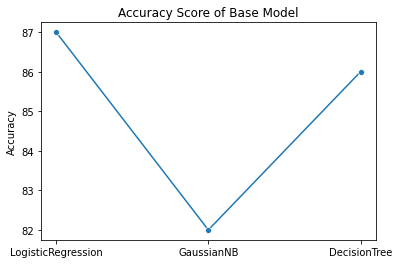

In [58]:
d={'Accuracy':[87,82,86],'BE':[0.06971378025644392,0.12647517678497588,0.15343311294270046],'VE':[0.0050639719710028445,0.0057819258576719615,0.012268556938324416]}
R=pd.DataFrame(d,index=l)
R
sns.lineplot(y=R['Accuracy'],x=R.index,marker='o')
plt.title("Accuracy Score of Base Model")
plt.show()

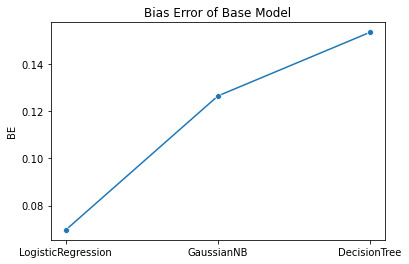

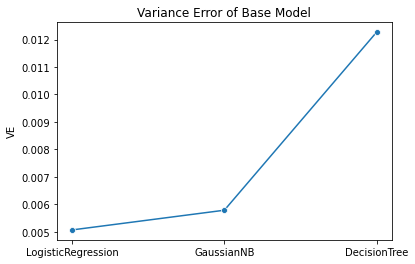

In [59]:
sns.lineplot(y=R['BE'],x=R.index,marker='o')
plt.title("Bias Error of Base Model")
plt.show()
sns.lineplot(y=R['VE'],x=R.index,marker='o')
plt.title("Variance Error of Base Model")
plt.show()

In [60]:
LS2.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'converted', 'lead_origin', 'lead_source', 'last_activity',
       'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation', 'tags', 'lead_quality',
       'lead_profile', 'city', 'last_notable_activity', 'do_not_email',
       'country', 'a_free_copy_of_mastering_the_interview',
       'what_matters_most_to_you_in_choosing_a_course'],
      dtype='object')

## VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif['VIF']
vif['Features']=df1.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
5,inf,lead_origin_Lead Add Form
10,inf,lead_source_Reference
4,38.803042,lead_origin_Landing Page Submission
48,34.466654,last_notable_activity_Email Opened
50,34.208510,last_notable_activity_Modified
...,...,...
44,1.140719,city_Other Metro Cities
56,1.075527,last_notable_activity_others
58,1.072628,country_Non Indian
46,1.038243,city_Tier II Cities


In [62]:
vif_df = LS2.drop(['do_not_email','page_views_per_visit','country','city','what_matters_most_to_you_in_choosing_a_course','a_free_copy_of_mastering_the_interview'],axis=1)

In [63]:
Cat=[]
for i in vif_df.columns:
    if vif_df[i].dtype=='object':
        Cat.append(i)
vif_df_LS2=pd.get_dummies(data=vif_df,drop_first=True)

In [64]:
vif_df_LS2[['lead_source_Reference','lead_origin_Lead Add Form']].head(150)

,lead_source_Reference,lead_origin_Lead Add Form
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,0
146,0,0
147,0,0
148,0,0


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2.values,i)for i in range(vif_df_LS2.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
9,inf,lead_source_Reference
4,inf,lead_origin_Lead Add Form
3,36.408284,lead_origin_Landing Page Submission
42,33.969414,last_notable_activity_Email Opened
44,33.624657,last_notable_activity_Modified
28,28.446795,what_is_your_current_occupation_Unemployed
47,26.049906,last_notable_activity_SMS Sent
7,14.806803,lead_source_Olark Chat
11,14.376434,last_activity_Email Opened
37,12.499174,lead_quality_Not Sure


### Dropping lead_source_Reference and keeping lead_origin_Lead Add Form

In [66]:
vif_df_LS2_dropping_reference = vif_df_LS2.drop('lead_source_Reference',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2_dropping_reference.values,i)for i in range(vif_df_LS2_dropping_reference.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2_dropping_reference.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
3,36.408284,lead_origin_Landing Page Submission
41,33.969414,last_notable_activity_Email Opened
43,33.624657,last_notable_activity_Modified
27,28.446795,what_is_your_current_occupation_Unemployed
46,26.049906,last_notable_activity_SMS Sent
7,14.806803,lead_source_Olark Chat
10,14.376434,last_activity_Email Opened
36,12.499174,lead_quality_Not Sure
13,11.776939,last_activity_SMS Sent
6,9.354053,lead_source_Google


### Dropping lead_origin_Lead Add Form  and keeping lead_source_Reference

In [67]:
vif_df_LS2_drop_add_form = vif_df_LS2.drop('lead_origin_Lead Add Form',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2_drop_add_form.values,i)for i in range(vif_df_LS2_drop_add_form.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2_drop_add_form.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
3,36.408284,lead_origin_Landing Page Submission
41,33.969414,last_notable_activity_Email Opened
43,33.624657,last_notable_activity_Modified
27,28.446795,what_is_your_current_occupation_Unemployed
46,26.049906,last_notable_activity_SMS Sent
6,14.806803,lead_source_Olark Chat
10,14.376434,last_activity_Email Opened
36,12.499174,lead_quality_Not Sure
13,11.776939,last_activity_SMS Sent
5,9.354053,lead_source_Google


<b> lead_origin_Lead Add Form and lead_source_Reference are mirrored values and this can also be confirmed by the VIF values.Hence dropping one of the columns

#### Dropping lead_source_Reference

In [68]:
vif_df_LS2 = vif_df_LS2.drop('lead_source_Reference',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2.values,i)for i in range(vif_df_LS2.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
3,36.408284,lead_origin_Landing Page Submission
41,33.969414,last_notable_activity_Email Opened
43,33.624657,last_notable_activity_Modified
27,28.446795,what_is_your_current_occupation_Unemployed
46,26.049906,last_notable_activity_SMS Sent
7,14.806803,lead_source_Olark Chat
10,14.376434,last_activity_Email Opened
36,12.499174,lead_quality_Not Sure
13,11.776939,last_activity_SMS Sent
6,9.354053,lead_source_Google


#### Dropping lead_origin_Landing Page Submission

In [69]:
vif_df_LS2 = vif_df_LS2.drop('lead_origin_Landing Page Submission',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2.values,i)for i in range(vif_df_LS2.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
26,27.841065,what_is_your_current_occupation_Unemployed
40,26.384871,last_notable_activity_Email Opened
42,24.576207,last_notable_activity_Modified
45,20.372060,last_notable_activity_SMS Sent
9,14.222437,last_activity_Email Opened
35,12.297741,lead_quality_Not Sure
12,11.636850,last_activity_SMS Sent
31,8.168921,tags_Will revert after reading the email
32,5.742685,tags_others
30,4.673422,tags_Ringing


#### Dropping what_is_your_current_occupation_Unemployed

In [70]:
vif_df_LS2 = vif_df_LS2.drop('what_is_your_current_occupation_Unemployed',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2.values,i)for i in range(vif_df_LS2.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
39,23.128438,last_notable_activity_Email Opened
41,20.671051,last_notable_activity_Modified
44,17.885311,last_notable_activity_SMS Sent
9,14.180950,last_activity_Email Opened
34,12.187590,lead_quality_Not Sure
12,11.594499,last_activity_SMS Sent
30,7.891946,tags_Will revert after reading the email
31,5.447553,tags_others
0,4.620694,total_visits
29,4.447068,tags_Ringing


#### Dropping last_notable_activity_Email Opened

In [71]:
vif_df_LS2 = vif_df_LS2.drop('last_notable_activity_Email Opened',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_df_LS2.values,i)for i in range(vif_df_LS2.shape[1])]
vif['VIF']
vif['Features']=vif_df_LS2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
12,10.862578,last_activity_SMS Sent
34,10.382051,lead_quality_Not Sure
9,9.735691,last_activity_Email Opened
43,7.858806,last_notable_activity_SMS Sent
30,7.079910,tags_Will revert after reading the email
40,5.465198,last_notable_activity_Modified
31,4.960720,tags_others
0,4.584681,total_visits
29,4.013227,tags_Ringing
22,3.861916,specialization_others


### SFS after VIF

In [72]:
x=vif_df_LS2.drop(['converted'],axis=1)
y=vif_df_LS2['converted']
x.columns

Index(['total_visits', 'total_time_spent_on_website',
       'lead_origin_Lead Add Form', 'lead_origin_others', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_others', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'last_activity_others', 'specialization_Business Administration',
       'specialization_E-Business', 'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Operations Management',
       'specialization_Supply Chain Management', 'specialization_others',
       'how_did_you_hear_about_x_education_Student of SomeSchool',
       'how_did_you_hear_about_x_education_Word Of Mouth',
       'how_did_you_hear_about_x_education_others',
       'what_is_your_current_occ

### SFS with estimator as LR

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
features = SequentialFeatureSelector(lr,k_features='best',cv=3)
features1 = features.fit(x,y)

In [74]:
features1.k_feature_names_

('total_time_spent_on_website',
 'lead_origin_Lead Add Form',
 'lead_origin_others',
 'lead_source_Google',
 'lead_source_Olark Chat',
 'lead_source_Organic Search',
 'lead_source_others',
 'last_activity_Email Opened',
 'last_activity_Olark Chat Conversation',
 'last_activity_SMS Sent',
 'specialization_Business Administration',
 'specialization_IT Projects Management',
 'specialization_others',
 'how_did_you_hear_about_x_education_Student of SomeSchool',
 'how_did_you_hear_about_x_education_others',
 'tags_Interested in other courses',
 'tags_Ringing',
 'tags_Will revert after reading the email',
 'tags_others',
 'lead_quality_Might be',
 'lead_quality_Not Sure',
 'lead_quality_Worst',
 'last_notable_activity_Had a Phone Conversation',
 'last_notable_activity_Modified',
 'last_notable_activity_Olark Chat Conversation',
 'last_notable_activity_Page Visited on Website',
 'last_notable_activity_SMS Sent',
 'last_notable_activity_others')

In [75]:
sfs_features = ['total_time_spent_on_website',
 'lead_origin_Lead Add Form',
 'lead_origin_others',
 'lead_source_Google',
 'lead_source_Olark Chat',
 'lead_source_Organic Search',
 'lead_source_others',
 'last_activity_Email Opened',
 'last_activity_Olark Chat Conversation',
 'last_activity_SMS Sent',
 'specialization_Business Administration',
 'specialization_IT Projects Management',
 'specialization_others',
 'how_did_you_hear_about_x_education_Student of SomeSchool',
 'how_did_you_hear_about_x_education_others',
 'tags_Interested in other courses',
 'tags_Ringing',
 'tags_Will revert after reading the email',
 'tags_others',
 'lead_quality_Might be',
 'lead_quality_Not Sure',
 'lead_quality_Worst',
 'last_notable_activity_Had a Phone Conversation',
 'last_notable_activity_Modified',
 'last_notable_activity_Olark Chat Conversation',
 'last_notable_activity_Page Visited on Website',
 'last_notable_activity_SMS Sent',
 'last_notable_activity_others']

## Modeling

In [76]:
x=vif_df_LS2[sfs_features]
y=vif_df_LS2['converted']
x.columns

Index(['total_time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_origin_others', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_others',
       'last_activity_Email Opened', 'last_activity_Olark Chat Conversation',
       'last_activity_SMS Sent', 'specialization_Business Administration',
       'specialization_IT Projects Management', 'specialization_others',
       'how_did_you_hear_about_x_education_Student of SomeSchool',
       'how_did_you_hear_about_x_education_others',
       'tags_Interested in other courses', 'tags_Ringing',
       'tags_Will revert after reading the email', 'tags_others',
       'lead_quality_Might be', 'lead_quality_Not Sure', 'lead_quality_Worst',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website',
       'last_notable_activity_SMS Sent

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix

kf=KFold(n_splits=5,shuffle=True,random_state=0)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Logistic Regression

In [79]:
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)

score=cross_val_score(LR,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

y_predicted=LR.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Logistic Regression base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

bias error: 0.0681741333189706 variance error: 0.00388490806849272
Accuracy of Logistic Regression base model= 87.15728715728716


array([[1537,  145],
       [ 211,  879]], dtype=int64)

In [80]:
from sklearn import metrics
print(metrics.classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1682
           1       0.86      0.81      0.83      1090

    accuracy                           0.87      2772
   macro avg       0.87      0.86      0.86      2772
weighted avg       0.87      0.87      0.87      2772



### DecisionTreeClassifier

In [81]:
dt=DecisionTreeClassifier(random_state=0)
model4=dt.fit(xtrain,ytrain)

y_predicted=dt.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Decission Tree base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Decission Tree base model= 85.82251082251082


array([[1501,  181],
       [ 212,  878]], dtype=int64)

In [82]:
from sklearn import metrics
print(metrics.classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1682
           1       0.83      0.81      0.82      1090

    accuracy                           0.86      2772
   macro avg       0.85      0.85      0.85      2772
weighted avg       0.86      0.86      0.86      2772



###  GaussianNB

In [83]:
NB=GaussianNB()
model3=NB.fit(xtrain,ytrain)

y_predicted=NB.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Naive Bayes base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Naive Bayes base model= 81.63780663780665


array([[1356,  326],
       [ 183,  907]], dtype=int64)

In [84]:
print(metrics.classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1682
           1       0.74      0.83      0.78      1090

    accuracy                           0.82      2772
   macro avg       0.81      0.82      0.81      2772
weighted avg       0.82      0.82      0.82      2772



----

### SFS with estimator as DT

In [85]:
dt = DecisionTreeClassifier()
features = SequentialFeatureSelector(dt,k_features='best',cv=3)
features1 = features.fit(x,y)

In [86]:
features1.k_feature_names_

('lead_origin_Lead Add Form',
 'lead_origin_others',
 'lead_source_Organic Search',
 'lead_source_others',
 'last_activity_Email Opened',
 'last_activity_Olark Chat Conversation',
 'last_activity_SMS Sent',
 'specialization_Business Administration',
 'tags_Interested in other courses',
 'tags_Ringing',
 'tags_Will revert after reading the email',
 'lead_quality_Might be',
 'lead_quality_Not Sure',
 'lead_quality_Worst',
 'last_notable_activity_Had a Phone Conversation',
 'last_notable_activity_Page Visited on Website',
 'last_notable_activity_SMS Sent',
 'last_notable_activity_others')

In [87]:
sfs_DT_features = ['lead_origin_Lead Add Form',
 'lead_origin_others',
 'lead_source_Organic Search',
 'lead_source_others',
 'last_activity_Email Opened',
 'last_activity_Olark Chat Conversation',
 'last_activity_SMS Sent',
 'specialization_Business Administration',
 'tags_Interested in other courses',
 'tags_Ringing',
 'tags_Will revert after reading the email',
 'lead_quality_Might be',
 'lead_quality_Not Sure',
 'lead_quality_Worst',
 'last_notable_activity_Had a Phone Conversation',
 'last_notable_activity_Page Visited on Website',
 'last_notable_activity_SMS Sent',
 'last_notable_activity_others']

## Modeling

In [88]:
x=vif_df_LS2[sfs_DT_features]
y=vif_df_LS2['converted']
x.columns

Index(['lead_origin_Lead Add Form', 'lead_origin_others',
       'lead_source_Organic Search', 'lead_source_others',
       'last_activity_Email Opened', 'last_activity_Olark Chat Conversation',
       'last_activity_SMS Sent', 'specialization_Business Administration',
       'tags_Interested in other courses', 'tags_Ringing',
       'tags_Will revert after reading the email', 'lead_quality_Might be',
       'lead_quality_Not Sure', 'lead_quality_Worst',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Page Visited on Website',
       'last_notable_activity_SMS Sent', 'last_notable_activity_others'],
      dtype='object')

In [89]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Logistic Regression

In [90]:
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)

score=cross_val_score(LR,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

y_predicted=LR.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Logistic Regression base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

bias error: 0.09154330824250034 variance error: 0.0019606160241728604
Accuracy of Logistic Regression base model= 85.42568542568543


array([[1519,  163],
       [ 241,  849]], dtype=int64)

In [91]:
from sklearn import metrics
print(metrics.classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1682
           1       0.84      0.78      0.81      1090

    accuracy                           0.85      2772
   macro avg       0.85      0.84      0.85      2772
weighted avg       0.85      0.85      0.85      2772



### DecisionTreeClassifier

In [92]:
dt=DecisionTreeClassifier(random_state=0)
model4=dt.fit(xtrain,ytrain)

y_predicted=dt.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Decission Tree base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Decission Tree base model= 88.09523809523809


array([[1589,   93],
       [ 237,  853]], dtype=int64)

In [93]:
from sklearn import metrics
print(metrics.classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1682
           1       0.90      0.78      0.84      1090

    accuracy                           0.88      2772
   macro avg       0.89      0.86      0.87      2772
weighted avg       0.88      0.88      0.88      2772



###  GaussianNB

In [94]:
NB=GaussianNB()
model3=NB.fit(xtrain,ytrain)

y_predicted=NB.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Naive Bayes base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Naive Bayes base model= 79.04040404040404


array([[1345,  337],
       [ 244,  846]], dtype=int64)

In [95]:
print(metrics.classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1682
           1       0.72      0.78      0.74      1090

    accuracy                           0.79      2772
   macro avg       0.78      0.79      0.78      2772
weighted avg       0.79      0.79      0.79      2772



___